In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import pandas_profiling as pp
import seaborn as sns


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Makya/owid-covid-data.csv')


**Rows & Columns in Dataset**

In [ ]:
df.shape


(164254, 67)

**Columns in Dataset**

In [ ]:
list(df.columns)

['iso_code',
 'continent',
 'location',
 'date',
 'total_cases',
 'new_cases',
 'new_cases_smoothed',
 'total_deaths',
 'new_deaths',
 'new_deaths_smoothed',
 'total_cases_per_million',
 'new_cases_per_million',
 'new_cases_smoothed_per_million',
 'total_deaths_per_million',
 'new_deaths_per_million',
 'new_deaths_smoothed_per_million',
 'reproduction_rate',
 'icu_patients',
 'icu_patients_per_million',
 'hosp_patients',
 'hosp_patients_per_million',
 'weekly_icu_admissions',
 'weekly_icu_admissions_per_million',
 'weekly_hosp_admissions',
 'weekly_hosp_admissions_per_million',
 'new_tests',
 'total_tests',
 'total_tests_per_thousand',
 'new_tests_per_thousand',
 'new_tests_smoothed',
 'new_tests_smoothed_per_thousand',
 'positive_rate',
 'tests_per_case',
 'tests_units',
 'total_vaccinations',
 'people_vaccinated',
 'people_fully_vaccinated',
 'total_boosters',
 'new_vaccinations',
 'new_vaccinations_smoothed',
 'total_vaccinations_per_hundred',
 'people_vaccinated_per_hundred',
 'peo

# **Dataset**

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24-02-2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
df.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
164249,ZWE,Africa,Zimbabwe,20-02-2022,233352.0,128.0,281.571,5386.0,0.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
164250,ZWE,Africa,Zimbabwe,21-02-2022,233571.0,219.0,281.143,5386.0,0.0,1.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
164251,ZWE,Africa,Zimbabwe,22-02-2022,233980.0,409.0,339.571,5388.0,2.0,2.000,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
164252,ZWE,Africa,Zimbabwe,23-02-2022,234589.0,609.0,339.429,5388.0,0.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
164253,ZWE,Africa,Zimbabwe,24-02-2022,234967.0,378.0,338.429,5390.0,2.0,1.286,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [ ]:
df.sample(5)

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
119002,PHL,Asia,Philippines,13-07-2021,1481660.0,3599.0,5118.286,26092.0,77.0,113.714,...,7.8,40.8,78.463,1.00,71.23,0.718,NaN,NaN,NaN,NaN
77613,JOR,Asia,Jordan,11-02-2021,341984.0,1807.0,1459.429,4421.0,10.0,9.571,...,NaN,NaN,NaN,1.40,74.53,0.729,NaN,NaN,NaN,NaN
110080,OWID_NAM,NaN,North America,21-06-2020,2655369.0,34433.0,34923.714,155435.0,1427.0,1340.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31463,CHN,Asia,China,07-12-2020,86649.0,15.0,15.286,4634.0,0.0,0.000,...,1.9,48.4,NaN,4.34,76.91,0.761,NaN,NaN,NaN,NaN
41293,DJI,Africa,Djibouti,26-07-2021,11637.0,2.0,1.429,155.0,0.0,0.000,...,1.7,24.5,NaN,1.40,67.11,0.524,NaN,NaN,NaN,NaN


# **Size of Dataset**

In [ ]:
df.size

11005018

# **Datatype**


In [ ]:
df.dtypes

# **dataset info**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164254 entries, 0 to 164253
Data columns (total 67 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    164254 non-null  object 
 1   continent                                   154415 non-null  object 
 2   location                                    164254 non-null  object 
 3   date                                        164254 non-null  object 
 4   total_cases                                 161238 non-null  float64
 5   new_cases                                   161214 non-null  float64
 6   new_cases_smoothed                          160063 non-null  float64
 7   total_deaths                                143479 non-null  float64
 8   new_deaths                                  143650 non-null  float64
 9   new_deaths_smoothed                         143520 non-null  float64
 

In [ ]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.612380e+05,1.612140e+05,1.600630e+05,1.434790e+05,143650.000000,143520.000000,160489.000000,160465.000000,159319.000000,142743.000000,...,104733.000000,103296.000000,67714.000000,122131.000000,153323.000000,134549.000000,5.662000e+03,5662.000000,5662.000000,5662.000000
mean,2.463972e+06,1.133510e+04,1.127887e+04,5.688737e+04,171.340808,170.599565,28330.720345,161.772370,160.210897,500.991938,...,10.627915,32.777386,50.795250,3.028164,73.577002,0.725621,3.742413e+04,9.375304,15.970030,965.191533
std,1.491533e+07,8.337909e+04,8.123163e+04,2.981759e+05,834.838545,812.502633,49154.035190,671.516946,516.647665,774.470473,...,10.559427,13.522415,31.812874,2.450479,7.492187,0.149970,1.036478e+05,16.430009,30.143799,1410.959757
min,1.000000e+00,-7.434700e+04,-6.223000e+03,1.000000e+00,-3933.000000,-361.000000,0.001000,-13876.282000,-1936.106000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1826.595723
25%,1.937000e+03,1.000000e+00,6.714000e+00,7.700000e+01,0.000000,0.143000,606.885000,0.042000,1.589000,18.165000,...,1.900000,21.600000,19.351000,1.300000,69.500000,0.602000,-7.575000e+01,-0.730000,-0.750000,-29.874241
50%,2.536300e+04,7.900000e+01,1.050000e+02,7.680000e+02,2.000000,2.429000,4606.869000,11.320000,18.345000,123.458000,...,6.300000,31.400000,49.839000,2.400000,75.050000,0.743000,3.400100e+03,6.035000,7.195000,469.752152
75%,2.897222e+05,1.050000e+03,1.121642e+03,7.190000e+03,20.000000,20.714000,36486.110000,99.716000,117.947500,694.567500,...,19.300000,41.300000,83.241000,4.000000,78.930000,0.845000,2.451072e+04,14.500000,22.882500,1650.520675
max,4.314220e+08,4.235024e+06,3.437210e+06,5.928470e+06,18057.000000,14705.714000,676472.387000,51427.491000,16052.608000,6298.552000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.080748e+06,111.010000,374.730000,8951.020458


In [ ]:
df['total_cases'].max()

431422036.0

# **Removing Duplicates Values**


In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24-02-2020,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28-02-2020,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [ ]:
df[df.duplicated()]


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million


# ***Null Values.***

In [ ]:
df.isnull().sum()


iso_code                                        0
continent                                    9839
location                                        0
date                                            0
total_cases                                  3016
                                            ...  
human_development_index                     29705
excess_mortality_cumulative_absolute       158592
excess_mortality_cumulative                158592
excess_mortality                           158592
excess_mortality_cumulative_per_million    158592
Length: 67, dtype: int64

# **Numerical columns**

In [ ]:
df_num=df.select_dtypes(include=np.number)
print('')
print('numerical data=',df_num.columns)
print('\n')
print('total there are %d numerical col '%(len(df_num.columns)))


numerical data= Index(['total_cases', 'new_cases', 'new_cases_smoothed', 'total_deaths',
       'new_deaths', 'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       'total_vaccinations_per_hundred', 'people_vaccinated

# **Categorical col**

In [ ]:
df_cat=df.select_dtypes(exclude=np.number)
print('categorical data=',df_cat.columns)
print('total there are %d categorical col '%(len(df_cat.columns)))

categorical data= Index(['iso_code', 'continent', 'location', 'date', 'tests_units'], dtype='object')
total there are 5 categorical col 


# **Handling Categorical columns**

In [ ]:
from sklearn.impute import SimpleImputer
SI=SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_cat[df_cat.columns]=SI.fit_transform(df_cat[df_cat.columns])
df_cat.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[col] = igetitem(value, i)


iso_code       0
continent      0
location       0
date           0
tests_units    0
dtype: int64

# check the unique value of the categorical columns

In [ ]:
for col in df_cat.columns:
  print(col,'\n',df_cat[col].unique(),'\n')

In [ ]:
df[df_cat.columns]=df_cat

In [ ]:
df

# **Handling** **Numerical columns** 

In [ ]:
df_number_treated=df_num.fillna(df_num.mean())#using the mean value
df_number_treated.isnull().sum()

total_cases                                0
new_cases                                  0
new_cases_smoothed                         0
total_deaths                               0
new_deaths                                 0
                                          ..
human_development_index                    0
excess_mortality_cumulative_absolute       0
excess_mortality_cumulative                0
excess_mortality                           0
excess_mortality_cumulative_per_million    0
Length: 62, dtype: int64

In [ ]:
df[df_number_treated.columns]=df_number_treated

In [ ]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24-02-2020,5.0,5.0,11278.873796,56887.366834,171.340808,170.599565,...,10.627915,32.777386,37.746,0.5,64.83,0.511,37424.126298,9.375304,15.97003,965.191533
1,AFG,Asia,Afghanistan,25-02-2020,5.0,0.0,11278.873796,56887.366834,171.340808,170.599565,...,10.627915,32.777386,37.746,0.5,64.83,0.511,37424.126298,9.375304,15.97003,965.191533
2,AFG,Asia,Afghanistan,26-02-2020,5.0,0.0,11278.873796,56887.366834,171.340808,170.599565,...,10.627915,32.777386,37.746,0.5,64.83,0.511,37424.126298,9.375304,15.97003,965.191533
3,AFG,Asia,Afghanistan,27-02-2020,5.0,0.0,11278.873796,56887.366834,171.340808,170.599565,...,10.627915,32.777386,37.746,0.5,64.83,0.511,37424.126298,9.375304,15.97003,965.191533
4,AFG,Asia,Afghanistan,28-02-2020,5.0,0.0,11278.873796,56887.366834,171.340808,170.599565,...,10.627915,32.777386,37.746,0.5,64.83,0.511,37424.126298,9.375304,15.97003,965.191533


# **Outlier Detection**

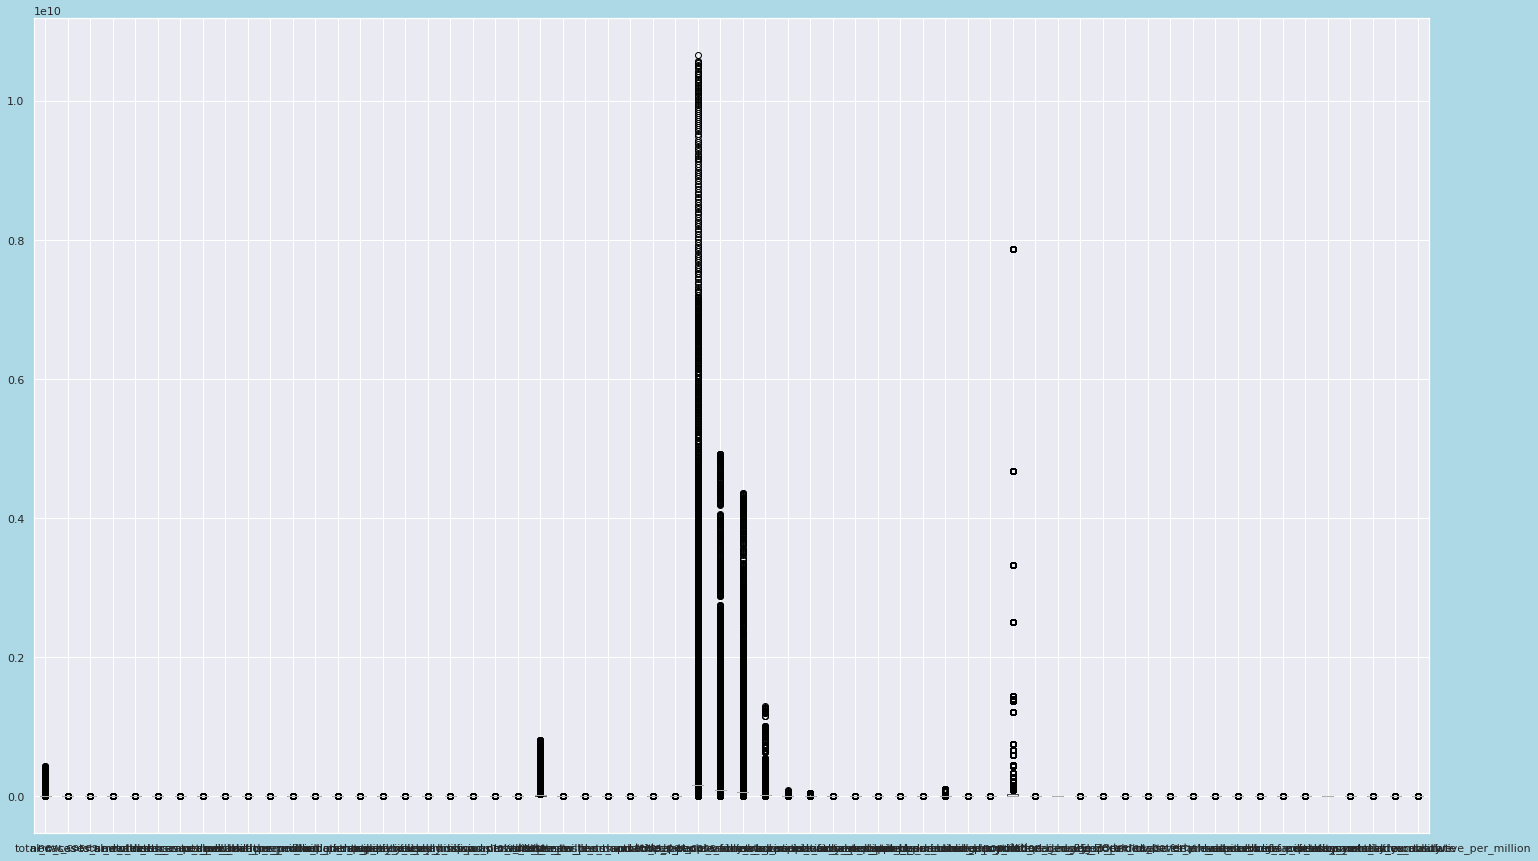

In [ ]:
plt.figure(figsize=(25,15))
df.boxplot()
plt.show()